# Dropout 0.4, size  400x400pxl


In [3]:
import os
import cv2
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd



Lokacija dataset-a

In [4]:
dataset_path = "../data_set"

In [5]:
classes = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]


Inicijalizacija lista za cuvanje podataka


In [6]:
data = []
labels = []

Ucitavanje slika kroz klase


In [7]:
for class_name in classes:
    class_path = os.path.join(dataset_path, "Training", class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Učitavanje slike u crno-belom formatu
        img = cv2.resize(img, (224, 224))  # Da sve slike budu 224x224pxl
        data.append(img)
        labels.append(classes.index(class_name))


Konvertovanje listi u numpy


In [8]:
data = np.array(data) / 255.0  # Normalizacija vrednosti piksela
data = np.expand_dims(data, axis=-1)
labels = np.array(labels)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


ImageDataGenerator za data augmentation


In [10]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

CNN model sa Dropout slojem


In [11]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))  
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.4))  # Dodajemo Dropout sloj sa dropout rate-om 0.4
model.add(Dense(len(classes), activation='softmax'))

/home/teki/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=40, validation_data=(X_val, y_val))


Epoch 1/40


/home/teki/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.3242 - loss: 1.3554 - val_accuracy: 0.2422 - val_loss: 1.3573
Epoch 2/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.4581 - loss: 1.2089 - val_accuracy: 0.5261 - val_loss: 1.0718
Epoch 3/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.5384 - loss: 1.0600 - val_accuracy: 0.6063 - val_loss: 0.9105
Epoch 4/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5596 - loss: 1.0308 - val_accuracy: 0.6568 - val_loss: 0.8465
Epoch 5/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6056 - loss: 0.9825 - val_accuracy: 0.6812 - val_loss: 0.7625
Epoch 6/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6388 - loss: 0.8616 - val_accuracy: 0.6742 - val_loss: 0.7444
Epoch 7/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.6007 - loss: 0.9136 - val_accuracy: 0.7108 - val_loss: 0.6780
Epoch 8/40
72/72 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.6511 - loss: 0.8546 - val_accuracy: 0.6777 - val_loss: 0.7004
Epo

Evaluacija modela na test skupu

In [14]:
test_data = []
test_labels = []

In [15]:
for class_name in classes:
    class_path = os.path.join(dataset_path, "Testing", class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Učitavanje slike u crno-belom formatu
        img = cv2.resize(img, (224, 224))
        test_data.append(img)
        test_labels.append(classes.index(class_name))


In [16]:
test_data = np.array(test_data) / 255.0
test_data = np.expand_dims(test_data, axis=-1)
test_labels = np.array(test_labels)



Classification report


In [17]:
from sklearn.metrics import classification_report

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step


In [18]:
report = classification_report(test_labels, predicted_classes, target_names=classes)
print("Classification Report:")
print(report)

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       1.00      0.17      0.29       100
meningioma_tumor       0.58      0.35      0.43       115
        no_tumor       0.38      0.99      0.55       105
 pituitary_tumor       0.82      0.36      0.50        74

        accuracy                           0.48       394
       macro avg       0.69      0.47      0.44       394
    weighted avg       0.68      0.48      0.44       394



Preciznostje visoka za glioma tumore i pituitary tumore, ali niska za meningioma tumore i slike bez tumora, što znači da model često daje pogrešne pozitivne predikcije za ove klase.

Odziv je visok za slike bez tumora, ali nizak za glioma tumore, meningioma tumore i pituitary tumore, što znači da model propušta veliki broj stvarnih slučajeva ovih tumora.

F1-score vrednosti pokazuju da model ima slabe performanse za sve klase, posebno za glioma tumore i meningioma tumore.

Kreiranje tabele sa rezultatima


In [19]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)


In [20]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

In [21]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=0)

In [22]:
results = {
    "Model": ["CNN - Dropout(0.4)"],
    "Train Loss": [train_loss],
    "Train Accuracy": [train_accuracy],
    "Validation Loss": [val_loss],
    "Validation Accuracy": [val_accuracy],
    "Test Loss": [test_loss],
    "Test Accuracy": [test_accuracy]
}

In [23]:
results_df = pd.DataFrame(results)

# Čuvanje tabele rezultata kao CSV fajl
results_df.to_csv("model_results_dropout0_4.csv", index=False)

In [24]:
print(results_df)

                Model  Train Loss  Train Accuracy  Validation Loss  \
0  CNN - Dropout(0.4)    0.237766         0.90331         0.280245   

   Validation Accuracy  Test Loss  Test Accuracy  
0             0.879791   2.881981       0.477157  


Rezultati

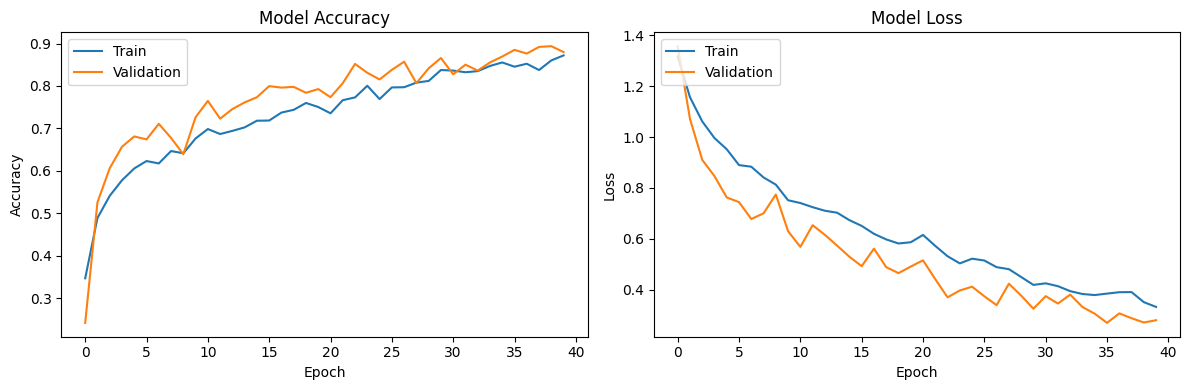

In [25]:
# training history
plt.figure(figsize=(12, 4))

#  training & validation accuracy 
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# training & validation loss 
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**Accuracy** 

Trening : tačnost na trening setu pokazuje konzistentan rast tokom prvih nekoliko epoha, stabilizuje se oko 30. epohe. Ovo ukazuje na to da model uspešno uči iz trening podataka.

Validacija : tačnost na validacionom setu takođe pokazuje sličan trend rasta i stabilizuje se oko iste vrednosti kao i trening tačnost. To je dobar znak da model nije preprilagođen na trening podacima.

**Loss**

Trening : Greska na trening setu opada brzo tokom početnih epoha i nastavlja blago opadati, stabilizujući se prema kraju treniranja. Ovo pokazuje da model postaje sve efikasniji u predviđanju trening podataka.

Validacija : Greska na validacionom setu pokazuje sličan trend opadanja kao i trening gubitak, što je takođe znak dobrog generalizovanja. To znači da model dobro radi na neviđenim podacima.